# Part-1 Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [ ]:
plt.scatter()

In [ ]:
file_name = "drive/MyDrive/cap_train.csv"

## Importing and reading file

In [ ]:
df=pd.read_csv(file_name)

In [ ]:
df['is_promoted'].value_counts()

0    40112
1     3734
Name: is_promoted, dtype: int64

In [ ]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,76466,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,46459,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,11890,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,76483,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,63365,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0
5,54862,Operations,region_2,Bachelor's,m,sourcing,2,30,NaN,1,0,0,60,0
6,31658,Legal,region_27,Below Secondary,m,other,1,26,5.0,3,1,0,60,0
7,57032,Technology,region_16,Bachelor's,f,other,1,35,1.0,2,0,0,83,0
8,65729,Sales & Marketing,region_2,NaN,f,other,1,52,1.0,3,0,0,52,0
9,25598,Sales & Marketing,region_29,Bachelor's,m,other,1,27,4.0,2,1,0,49,0


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,43846.000000,43846.000000,43846.000000,40521.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,39189.407198,1.251950,34.812503,3.327114,5.867057,0.351868,0.022807,63.348128,0.085162
std,22578.548145,0.609719,7.662864,1.259761,4.273456,0.477558,0.149290,13.359844,0.279125
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19655.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39262.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58710.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
df.shape

(43846, 14)

Checking if the types are correct

In [ ]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [ ]:
df['KPIs_met >80%'].unique()

array([0, 1])

Since KPIs_met >80% is categorical variables we need to change the types.

In [ ]:
df['KPIs_met >80%']=df['KPIs_met >80%'].astype('object')

In [ ]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Initialising Target

In [ ]:
target = 'is_promoted'
features = ['department','education','gender','no_of_trainings','age',
            'previous_year_rating','length_of_service','KPIs_met >80%',
            'awards_won?','avg_training_score']

### Missing Values

In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1941
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3325
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

From above we can see that there are null values and they are less than 7.5%
1. Missing Education values can be filled using median of the department.
2. And Previous year rating can be replaced with the mean

In [ ]:
df['education']=df.groupby(['department'])['education'].transform(lambda x: x.fillna(x.mode()[0]))

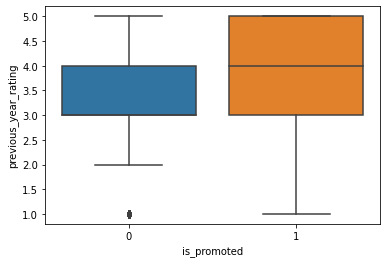

In [ ]:
sns.boxplot(data=df, x='is_promoted', y='previous_year_rating')

In [ ]:
pd.crosstab(df['is_promoted'], df['previous_year_rating'])

previous_year_rating,1.0,2.0,3.0,4.0,5.0
is_promoted,,,,,
0,4912,3236,13837,7252,7833
1,71,147,1075,630,1528


In [ ]:
pd.crosstab(df['previous_year_rating'], df['is_promoted'])

is_promoted,0,1
previous_year_rating,,
1.0,4912,71
2.0,3236,147
3.0,13837,1075
4.0,7252,630
5.0,7833,1528


Since there is a positive relation between previous_year_rating and promotion we cannot drop values

So Filling the missing values with next value

In [ ]:
df['previous_year_rating'].fillna(method='bfill',inplace=True)

In [ ]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

### Dividing numerical columns and Categorical columns

In [ ]:
num_col= df.select_dtypes(include=['int','float'])
num_col=num_col.drop('employee_id',axis=1)
cat_col= df.select_dtypes(include='object')

In [ ]:
num_col

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,1,34,3.0,7,0,52,0
1,1,50,3.0,19,0,76,0
2,1,40,3.0,7,0,79,0
3,1,33,5.0,6,0,48,0
4,1,34,3.0,8,0,67,0
...,...,...,...,...,...,...,...
43841,2,44,3.0,3,0,70,0
43842,1,34,5.0,3,0,47,0
43843,2,41,5.0,15,0,58,0
43844,1,51,5.0,10,0,53,0


In [ ]:
cat_col

,department,region,education,gender,recruitment_channel,KPIs_met >80%
0,Sales & Marketing,region_31,Bachelor's,f,other,0
1,Technology,region_2,Bachelor's,f,other,0
2,Technology,region_7,Bachelor's,m,other,0
3,Sales & Marketing,region_2,Bachelor's,f,sourcing,0
4,Procurement,region_17,Bachelor's,f,other,0
...,...,...,...,...,...,...
43841,Procurement,region_10,Master's & above,m,other,0
43842,Sales & Marketing,region_15,Bachelor's,m,other,0
43843,Operations,region_15,Master's & above,m,other,1
43844,Sales & Marketing,region_26,Bachelor's,m,other,0


### Check for outliers and univariate analysis

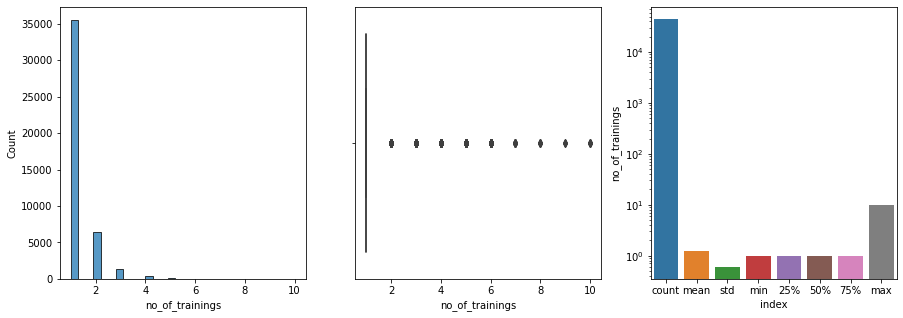

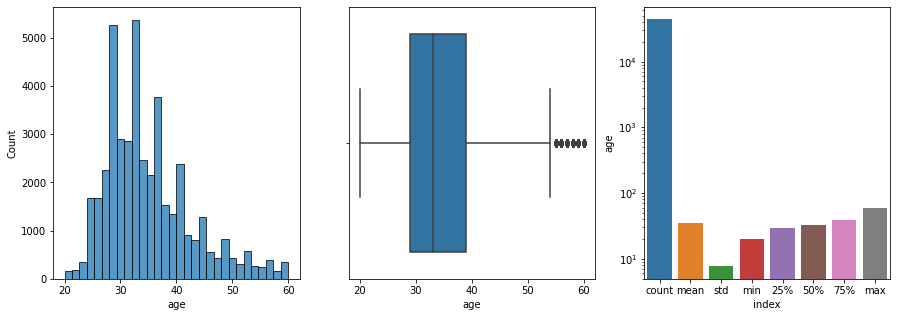

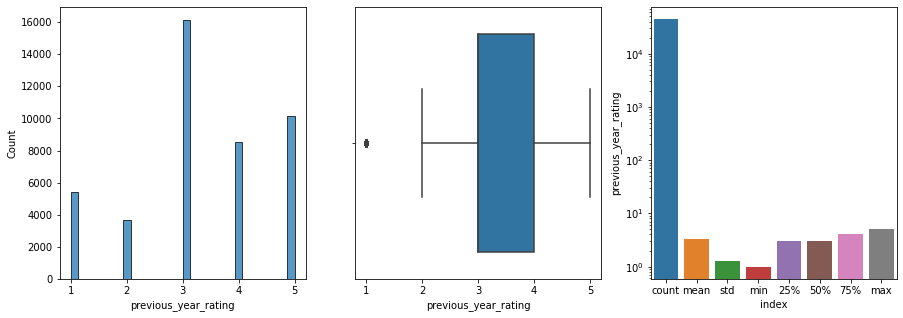

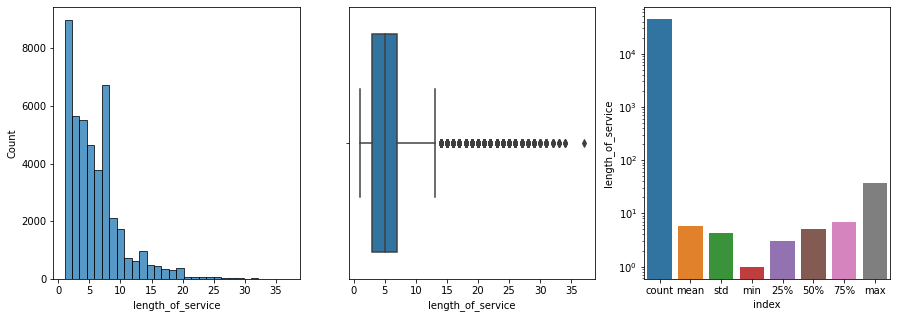

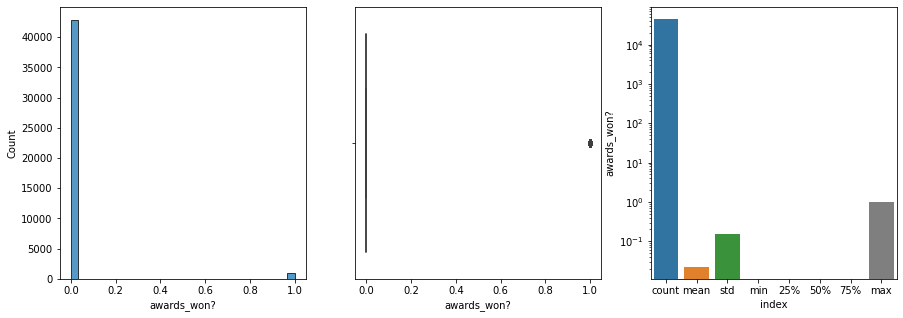

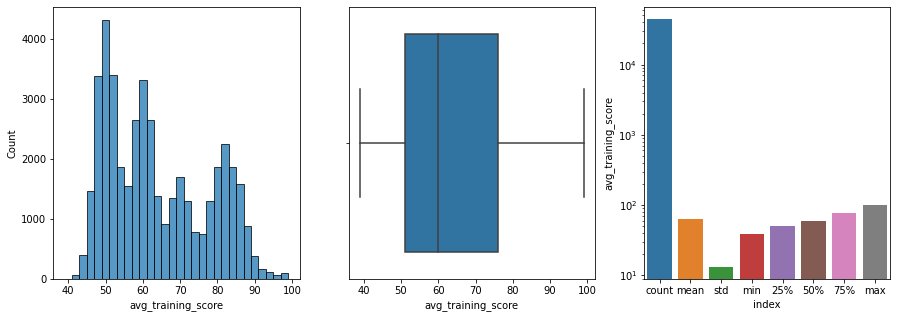

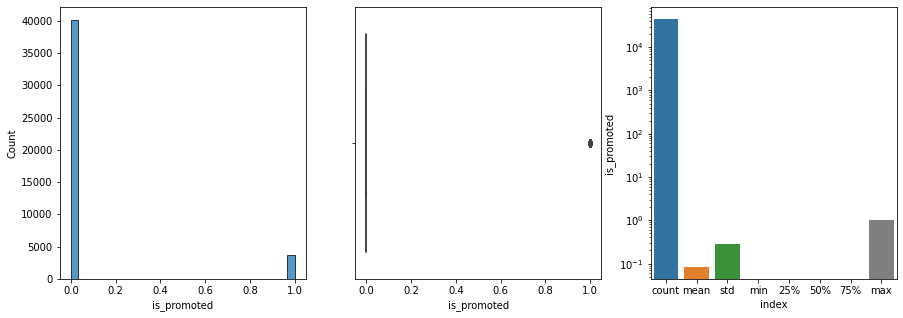

In [ ]:
for col in num_col:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=num_col, x=col, bins=30, ax = axs[0])
    sns.boxplot(x=num_col[col], ax=axs[1])
    g=sns.barplot(data= num_col[col].describe().reset_index(), x='index', y=col, ax=axs[2])
    g.set_yscale("log")

In [ ]:
age=df.loc[df['age']>55]
service=df.loc[df['length_of_service']<20]

In [ ]:
pd.merge(age,service)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,67609,Procurement,region_7,Master's & above,m,other,2,59,4.0,10,0,0,68,0
1,50432,Operations,region_2,Master's & above,m,other,1,60,5.0,8,0,0,64,0
2,52268,Sales & Marketing,region_2,Bachelor's,m,other,1,59,5.0,16,0,0,49,0
3,42384,Operations,region_2,Bachelor's,f,sourcing,1,57,3.0,9,0,0,61,0
4,11437,Procurement,region_2,Master's & above,m,sourcing,1,60,3.0,7,0,0,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,5043,Procurement,region_7,Master's & above,f,sourcing,1,59,3.0,18,0,0,70,0
730,13150,Procurement,region_2,Master's & above,f,other,1,58,1.0,13,0,0,70,0
731,47658,Procurement,region_17,Master's & above,f,sourcing,1,56,5.0,5,0,0,72,0
732,24023,Operations,region_7,Master's & above,f,other,1,56,5.0,7,1,1,61,1


In [ ]:
pd.crosstab(df['length_of_service'], df['is_promoted'], normalize=True)

is_promoted,0,1
length_of_service,,
1,0.076153,0.007139
2,0.110683,0.010811
3,0.117525,0.011061
4,0.114332,0.011107
5,0.097523,0.008690
6,0.079209,0.007002
7,0.092118,0.008484
8,0.047621,0.005040
9,0.043790,0.004128


From above section, we can observe that there are outliers present.
Checking them we found out few mistakes in the data.
1. The people whose age is >55 are having less than 15 years of working experience. The data might be false.
2. Majority of the length of service data is concentrated in between 2 to 7.
3. Checking if there is any relationship between length_of_service and promotion. There seems to be no relation between them. So neglecting the outliers.

### Univariate Analysis for Categorical Variables

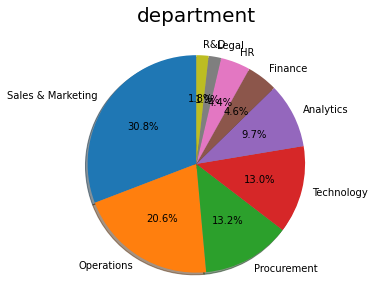

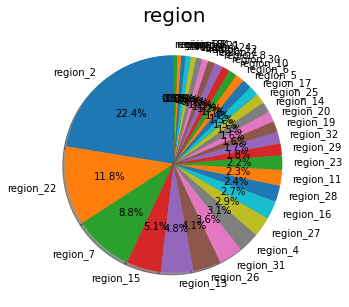

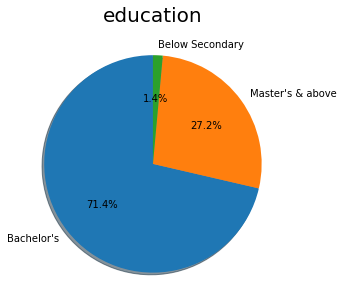

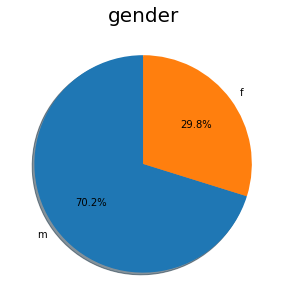

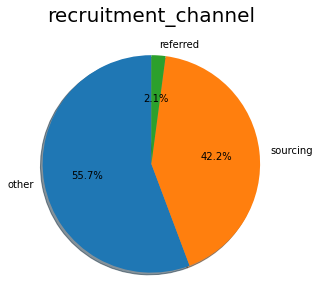

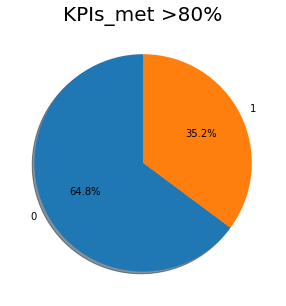

In [ ]:
for col in cat_col:
    fig = plt.subplots(figsize=(12,5))
    labels = df[col].value_counts().index
    sizes = df[col].value_counts()
    plt.pie(sizes, labels = labels, shadow = True, autopct='%1.1f%%',startangle = 90)
    plt.title(col, fontsize = 20)

From above graphs we can visualize the distribution of different categories.
1. Majority of the employees have completed their bachelor's degree.
2. The men are majority in the company.
3. The most common recruitment source is other source which was not mentioned.
4. More than 60% didn't meet their KPI.
5. And out of 100% only 8% of exployees have been promoted.

### Bivariate Analysis

In [ ]:
training=pd.crosstab(df['no_of_trainings'], df['is_promoted'])

In [ ]:
training

is_promoted,0,1
no_of_trainings,,
1,32400,3137
2,5907,471
3,1298,98
4,348,24
5,99,3
6,38,1
7,9,0
8,5,0
9,3,0


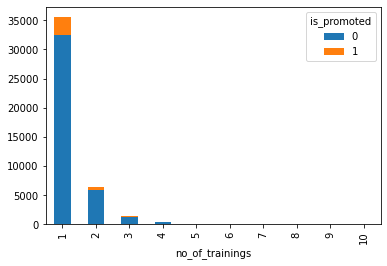

In [ ]:
training.plot.bar(stacked=True)

In [ ]:
age_1=pd.crosstab(df['age'], df['is_promoted'])

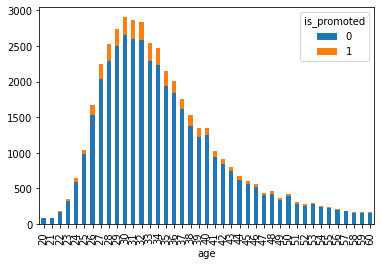

In [ ]:
age_1.plot.bar(stacked=True)

In [ ]:
rating=pd.crosstab(df['previous_year_rating'], df['is_promoted'])

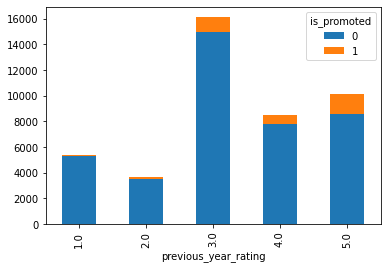

In [ ]:
rating.plot.bar(stacked=True)

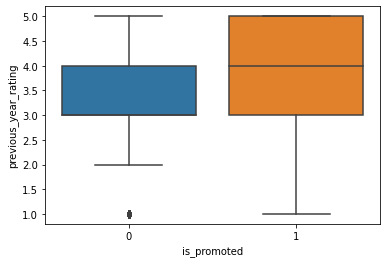

In [ ]:
sns.boxplot(data=df, x='is_promoted', y='previous_year_rating')

In [ ]:
experience=pd.crosstab(df['length_of_service'], df['is_promoted'], normalize=True)

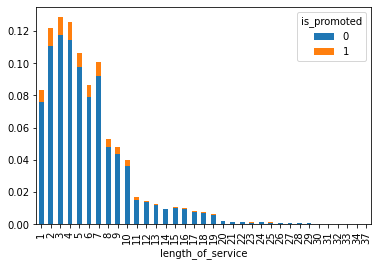

In [ ]:

experience.plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['awards_won?'], df['is_promoted'])

is_promoted,0,1
awards_won?,,
0,39551,3295
1,561,439


In [ ]:
pd.crosstab(df['avg_training_score'], df['is_promoted'])

is_promoted,0,1
avg_training_score,,
39,2,0
40,4,0
41,21,1
42,49,2
43,128,5
...,...,...
95,0,36
96,0,33
97,0,41


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


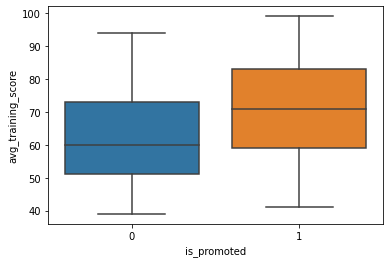

In [ ]:
sns.boxplot(df['is_promoted'], df['avg_training_score'])

In [ ]:
pd.crosstab(df['KPIs_met >80%'], df['is_promoted'], normalize=True)


is_promoted,0,1
KPIs_met >80%,,
0,0.622702,0.025430
1,0.292136,0.059732


In [ ]:
pd.crosstab(df['previous_year_rating'], df['avg_training_score'])

avg_training_score,39,40,41,42,43,44,45,46,47,48,...,90,91,92,93,94,95,96,97,98,99
previous_year_rating,,,,,,,,,,,,,,,,,,,,,
1.0,2,2,5,4,22,48,103,148,277,377,...,8,3,6,6,2,2,0,4,3,0
2.0,0,0,2,5,13,27,58,91,125,196,...,8,7,7,1,1,1,1,3,0,0
3.0,0,0,5,19,44,85,197,313,473,644,...,38,32,21,14,14,9,8,10,7,12
4.0,0,0,6,10,25,54,72,158,252,341,...,31,19,10,16,8,7,8,10,8,5
5.0,0,2,4,13,29,54,122,198,299,396,...,59,31,27,30,23,17,16,14,11,10


1. We can tell that there is no relation between KPIs_met >80% and is_promoted
2. From above we can also observe that there is a positive relation between avg_training_score and is_promoted.


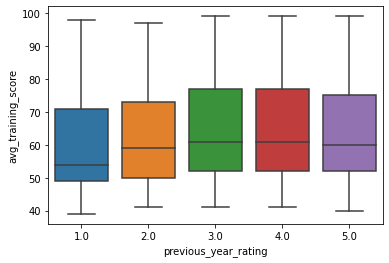

In [ ]:
sns.boxplot(data=df, x='previous_year_rating', y='avg_training_score')

In [ ]:
department=pd.crosstab(df['department'], df['is_promoted'])

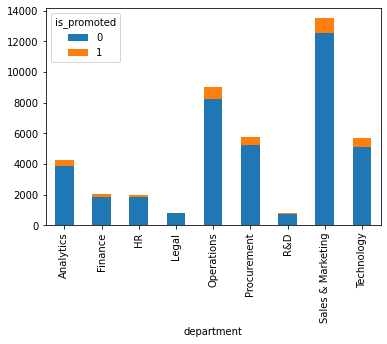

In [ ]:
department.plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['gender'], df['is_promoted'],normalize=True)

is_promoted,0,1
gender,,
f,0.271154,0.026935
m,0.643685,0.058227


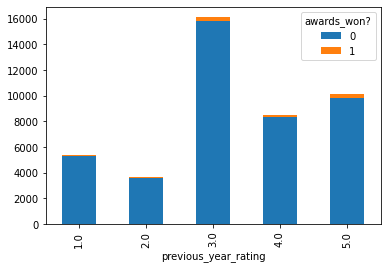

In [ ]:
ss=pd.crosstab(df['previous_year_rating'],df['awards_won?'])
ss.plot.bar(stacked=True)

In [ ]:
ss

awards_won?,0,1
previous_year_rating,,
1.0,5312,99
2.0,3592,71
3.0,15790,345
4.0,8327,187
5.0,9825,298


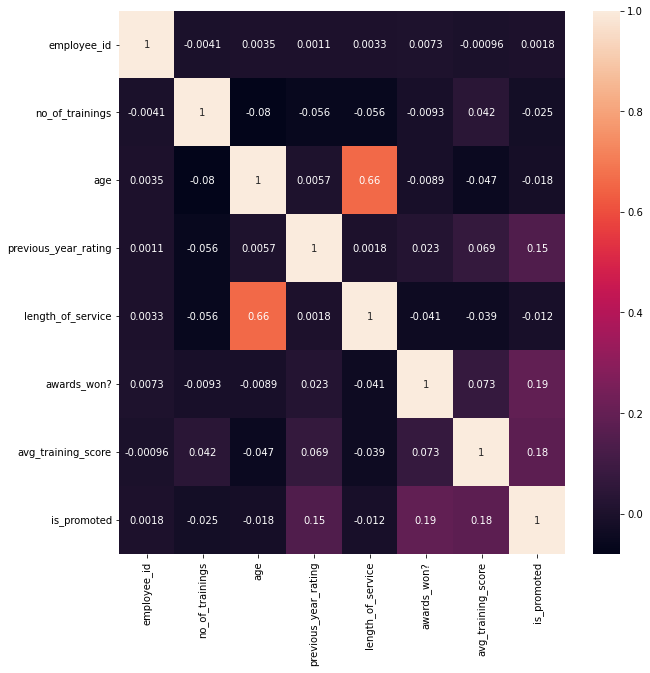

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

The following are the points we have observed in the above analysis:
1. There is actually a inverse relationship between no. of trainings and promotion.
2. The employees are highly probable to get promotion in the age range of 24-48 years. And it is right skewed distribution.
3. We can also say that there is positive relationship between avg traing score and promotion and the boxplot shows that it is near to normal distribution.
4. We can observe that there is no relationship between the length of service and the promotion. But the rate of promotion is higher at earlier period of their career which is a right skewed distribution.
5. But we can see that their is a probable relationship between the awards won and the promotion.
6. Their is a positive relationship between the previous year rating and promotion.
7. We can also observe from the graph that there is no relation between the department and getting promotion.
8. Also even if there is a visible difference in between the no. of male and female employees, but female are equally competetive in getting promotion.
9. There is a positive relationship between the awards won and previous_year_rating, which shows that they are inter-related
10. There is some correlation between age and length of service, which is normal.

# Part-2 Machine Learning Modelling

#### Getting data ready for modelling

In [ ]:
df['department'].replace(['Sales & Marketing', 'Technology', 'Procurement',
                          'Operations','Legal', 'Finance', 'Analytics', 'HR',
                          'R&D'],[1,2,3,4,5,6,7,8,9],inplace=True)
df['education'].replace(["Bachelor's", 'Below Secondary', "Master's & above"],[1,2,3],inplace=True)
df['gender'].replace(['f', 'm'],[0,1],inplace=True)

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,76466,1,region_31,1,0,other,1,34,3.0,7,0,0,52,0
1,46459,2,region_2,1,0,other,1,50,3.0,19,0,0,76,0
2,11890,2,region_7,1,1,other,1,40,3.0,7,0,0,79,0
3,76483,1,region_2,1,0,sourcing,1,33,5.0,6,0,0,48,0
4,63365,3,region_17,1,0,other,1,34,3.0,8,0,0,67,0


In [ ]:
df.dtypes

employee_id               int64
department                int64
region                   object
education                 int64
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Dropping unwanted columns

In [ ]:
df=df.drop(['recruitment_channel','employee_id','region'], axis=1)

In [ ]:
df.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
df.shape

(43846, 11)

## Splitting Data, Scaling and Resampling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [ ]:
y=df['is_promoted']
x=df.drop(['is_promoted'],axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

x_resample, y_resample = RandomOverSampler(sampling_strategy='auto', random_state=121).fit_resample(x,y.values.ravel(),)


print(x_resample.shape)
print(y_resample.shape)

(80224, 10)
(80224,)


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_resample,y_resample, test_size=0.2, random_state=121)

In [ ]:
sc= StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

### Logistic Regression

In [ ]:
model_1=LogisticRegression()

In [ ]:
model_1 = model_1.fit(train_x,train_y)

In [ ]:
test_pred_1=model_1.predict(test_x)

In [ ]:
model_1.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 10,
 'classes_': array([0, 1]),
 'n_iter_': array([11], dtype=int32),
 'coef_': array([[-0.38881882,  0.09391069,  0.00918444, -0.10135407, -0.19063804,
          0.42638049,  0.09796307,  0.83369074,  0.49405297,  0.83403248]]),
 'intercept_': array([0.03274885])}

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, test_pred_1))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      8052
           1       0.72      0.73      0.73      7993

    accuracy                           0.73     16045
   macro avg       0.73      0.73      0.73     16045
weighted avg       0.73      0.73      0.73     16045



In [ ]:
accuracy_1=accuracy_score(test_y, test_pred_1)

In [ ]:
accuracy_1

0.7270177625428482

In [ ]:
train_pred_1 = model_1.predict(train_x)

In [ ]:
mean_squared_error(train_y,(train_pred_1))

0.2753704482774739

In [ ]:
mean_squared_error(test_y,(test_pred_1))

0.2729822374571518

## K-Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_2=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_2.fit(train_x,train_y)

KNeighborsClassifier()

In [ ]:
test_pred_2=model_2.predict(test_x)

In [ ]:
print(classification_report(test_y, test_pred_2))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      8052
           1       0.86      1.00      0.92      7993

    accuracy                           0.92     16045
   macro avg       0.93      0.92      0.92     16045
weighted avg       0.93      0.92      0.92     16045



In [ ]:
accuracy_2=accuracy_score(test_y, test_pred_2)

In [ ]:
accuracy_2

0.9181676534746027

In [ ]:
train_pred_2 = model_2.predict(train_x)

In [ ]:
mean_squared_error(train_y,(train_pred_2))

0.059069165926549184

In [ ]:
mean_squared_error(test_y,(test_pred_2))

0.08183234652539732

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_3 = GaussianNB()

In [ ]:
model_3 = model_3.fit(train_x,train_y)

In [ ]:
test_pred_3=model_3.predict(test_x)

In [ ]:
print(classification_report(test_y, test_pred_3))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72      8052
           1       0.76      0.49      0.60      7993

    accuracy                           0.67     16045
   macro avg       0.69      0.67      0.66     16045
weighted avg       0.69      0.67      0.66     16045



In [ ]:
accuracy_3=accuracy_score(test_y, test_pred_3)

In [ ]:
accuracy_3

0.6697413524462449

In [ ]:
train_pred_3 = model_3.predict(train_x)

In [ ]:
mean_squared_error(train_y,(train_pred_3))

0.33422147431402793

In [ ]:
mean_squared_error(test_y,(test_pred_3))

0.33025864755375506

## Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
model_4 = tree.DecisionTreeClassifier(random_state=121)

In [ ]:
model_4 = model_4.fit(train_x,train_y)

In [ ]:
test_pred_4=model_4.predict(test_x)

In [ ]:
print(classification_report(test_y, test_pred_4))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      8052
           1       0.94      1.00      0.97      7993

    accuracy                           0.97     16045
   macro avg       0.97      0.97      0.97     16045
weighted avg       0.97      0.97      0.97     16045



In [ ]:
accuracy_4=accuracy_score(test_y, test_pred_4)

In [ ]:
accuracy_4

0.9668432533499532

In [ ]:
train_pred_4 = model_4.predict(train_x)

In [ ]:
mean_squared_error(train_y,(train_pred_4))

0.003256516929213606

In [ ]:
mean_squared_error(test_y,(test_pred_4))

0.033156746650046746

## Selecting best model

In [ ]:
classifiers = ['Logistic Regression','KNN','Naive Bayes','Decision Tree']

In [ ]:
accuracy = [accuracy_1,accuracy_2,accuracy_3,accuracy_4]

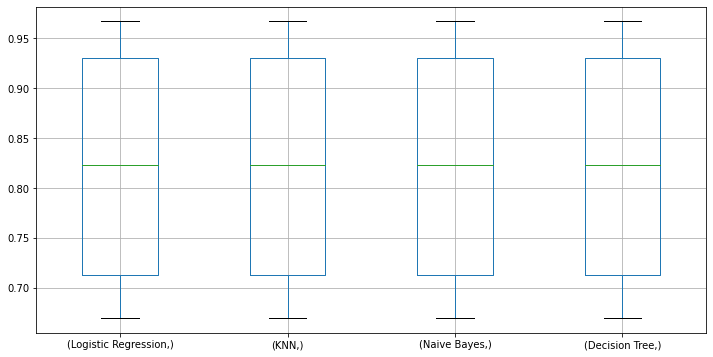

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame([accuracy],index=[classifiers])
box.T.boxplot()

From the above graph we can observe that all the methods have positive skew.
Hence selecting a method whose accuracy is high.

In [ ]:
acc = pd.DataFrame(accuracy,columns=['accuracy'], index=[classifiers])

In [ ]:
acc.sort_values(by=['accuracy'],ascending=False)

,accuracy
Decision Tree,0.966843
KNN,0.918168
Logistic Regression,0.727018
Naive Bayes,0.669741


So we can say that Desicion Tree model has high accuracy.


## Feature Importance

In [ ]:
feat=['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score']

In [ ]:
data={'features':feat,'coeff':model_1.coef_.flatten()}

In [ ]:
feature_importance = pd.DataFrame(data=data)

In [ ]:
feature_importance.sort_values(by = ['coeff'],ascending=False)

,features,coeff
9,avg_training_score,0.834032
7,KPIs_met >80%,0.833691
8,awards_won?,0.494053
5,previous_year_rating,0.426380
6,length_of_service,0.097963
1,education,0.093911
2,gender,0.009184
3,no_of_trainings,-0.101354
4,age,-0.190638
0,department,-0.388819


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

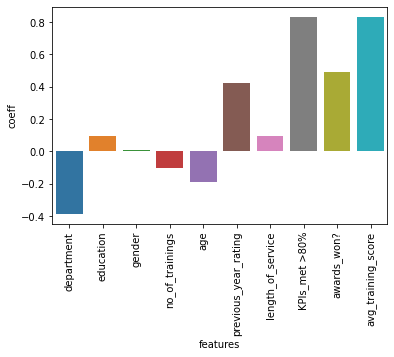

In [ ]:
sns.barplot(data=feature_importance, x='features',y='coeff')
plt.xticks(rotation='vertical')

From above graph we can see that the top 5 important features are:
1. Avg_training_score
2. KPIs_met >80%
3. Awards_won?
4. Previous_year_rating
5. Department

# Part-3 Prediction

In [ ]:
test_file = "drive/MyDrive/cap_test.csv"

In [ ]:
test= pd.read_csv(test_file)

In [ ]:
test.isnull().sum()

employee_id               0
department                0
region                    0
education               468
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    799
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
dtype: int64

Filling missing values just like before

In [ ]:
test['education']=test.groupby(['department'])['education'].transform(lambda x: x.fillna(x.mode()[0]))
test['previous_year_rating'].fillna(method='bfill',inplace=True)

In [ ]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
test['department'].replace(['Sales & Marketing', 'Technology', 'Procurement',
                          'Operations','Legal', 'Finance', 'Analytics', 'HR',
                          'R&D'],[1,2,3,4,5,6,7,8,9],inplace=True)
test['education'].replace(["Bachelor's", 'Below Secondary', "Master's & above"],[1,2,3],inplace=True)
test['gender'].replace(['f', 'm'],[0,1],inplace=True)

In [ ]:
test_1=test.drop(['recruitment_channel','employee_id','region'], axis=1)

In [ ]:
test_1.shape

(10962, 10)

In [ ]:
test_1=sc.transform(test_1)

In [ ]:
test_prediction=model_4.predict(test_1)

In [ ]:
test['is_promoted']=test_prediction

In [ ]:
test['is_promoted'].unique()

array([0, 1])

In [ ]:
(test['is_promoted']==1).sum()

1129

In [ ]:
test.shape

(10962, 14)

In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,13463,2,region_7,1,1,sourcing,1,33,4.0,7,0,0,79,0
1,16160,2,region_23,1,1,other,1,40,3.0,5,1,1,79,0
2,15840,7,region_19,1,1,other,1,40,3.0,5,0,0,86,0
3,28325,3,region_27,1,0,sourcing,3,26,3.0,2,1,1,69,0
4,23651,1,region_6,1,1,sourcing,1,29,4.0,6,0,0,50,0


In [ ]:
from google.colab import files
df.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')